In [2]:
import qutip
from qutip import Qobj, qeye, tensor
from qutip.qip.operations import cnot, rx, ry, rz
import numpy as np
from qiskit.visualization import array_to_latex
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

In [3]:
rzz = Qobj(np.array([[np.exp(-1j*np.pi/4),0,0,0],[0, np.exp(1j*np.pi/4),0,0],[0,0,np.exp(1j*np.pi/4),0],[0,0,0,np.exp(-1j*np.pi/4)]]), dims=[[2,2],[2,2]])
rzzm = Qobj(np.array([[np.exp(1j*np.pi/4),0,0,0],[0, np.exp(-1j*np.pi/4),0,0],[0,0,np.exp(-1j*np.pi/4),0],[0,0,0,np.exp(1j*np.pi/4)]]), dims=[[2,2],[2,2]])

v = Qobj([[5,0,0,0],[0,3,0,0],[0,0,-3,0],[0,0,0,-5]])
h_2 = tensor(qeye(2),ry(-np.pi/4))*tensor(qeye(2),rx(np.pi))*tensor(qeye(2), ry(np.pi/4))
# ryry is the sequence of Ry rotations that implement the Deutsch-Jozsa
def ryry():
    return tensor(ry(np.pi/2), ry(-np.pi/2))
h = ry(-np.pi/4)*rx(np.pi)*ry(np.pi/4)

P1 = (cnot(2,control=0,target=1)*cnot(2,control=1,target=0))
P1d = P1.dag()
P2 = (cnot(2,control=1,target=0)*cnot(2,control=0,target=1))
P2d = P2.dag()

# Hadamard on both qubits approx

In [40]:
array_to_latex(ryry())

<IPython.core.display.Latex object>

Hadamard on each qubit exact

In [41]:
array_to_latex(tensor(qutip.snot(), qutip.snot()))

<ipython-input-41-2c84dfd73f6c>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  array_to_latex(tensor(qutip.snot(), qutip.snot()))


<IPython.core.display.Latex object>

In [4]:
# attempting their p1 sequence
u1 = qutip.tensor(ry(np.pi/2), qutip.qeye(2))
u2 = rzz
u3 = qutip.tensor(rx(np.pi/2), ry(np.pi/2))
u4 = rzz
u5 = qutip.tensor(qutip.qeye(2), rx(np.pi/2))
p1_pulse = (u5*u4*u3*u2*u1)
p1_pulse_d = p1_pulse.dag()
array_to_latex(p1_pulse)

<IPython.core.display.Latex object>

In [5]:
u1 = tensor(qeye(2), rx(np.pi/2))
u2 = rzz
u3 = tensor(qeye(2), ry(np.pi/2))
cnot_approx = u1*u2*u3
array_to_latex(cnot_approx)

<IPython.core.display.Latex object>

In [6]:
u1 = tensor(qeye(2), ry(np.pi/4))
u2 = tensor(qeye(2), rx(np.pi))
u3 = tensor(qeye(2), ry(-np.pi/4))
u4 = tensor(rz(np.pi/2), qeye(2))
u5 = tensor(qeye(2), rz(np.pi/2))
u6 = rzz
u7 = tensor(qeye(2), ry(np.pi/4))
u8 = tensor(qeye(2), rx(np.pi))
u9 = tensor(qeye(2), ry(-np.pi/4))
gp_cnot = u9*u8*u7*u6*u5*u4*u3*u2*u1
array_to_latex(gp_cnot)

<IPython.core.display.Latex object>

Full DJ algorithm for first oracle

In [7]:
U1 = ryry()*gp_cnot*ryry().dag()
array_to_latex(U1)

<IPython.core.display.Latex object>

In [8]:
array_to_latex(Qobj(U1.data*v.data*U1.dag().data))

<IPython.core.display.Latex object>

In [43]:
array_to_latex(Qobj(U1.data*P1.data*v.data*P1d.data*U1.dag().data))

<IPython.core.display.Latex object>

In [45]:
array_to_latex(Qobj(U1.data*P2.data*v.data*P2d.data*U1.dag().data))

<IPython.core.display.Latex object>

Full DJ algorithm with second oracle

In [44]:
U2 = ryry()*tensor(rx(np.pi/2), qeye(2))*gp_cnot*tensor(rx(np.pi/2), qeye(2)).dag()*ryry().dag()
array_to_latex(U2)

<IPython.core.display.Latex object>

In [48]:
array_to_latex(Qobj(U2.data*v.data*U2.dag().data))

<IPython.core.display.Latex object>

In [46]:
array_to_latex(Qobj(U2.data*P1.data*v.data*P1d.data*U2.dag().data))

<IPython.core.display.Latex object>

In [47]:
array_to_latex(Qobj(U2.data*P2.data*v.data*P2d.data*U2.dag().data))

<IPython.core.display.Latex object>

Full DJ algorithm with third oracle

In [49]:
U3 = ryry()*ryry().dag()
array_to_latex(U3)

<IPython.core.display.Latex object>

In [50]:
array_to_latex(Qobj(U3.data*v.data*U3.dag().data))

<IPython.core.display.Latex object>

In [51]:
array_to_latex(Qobj(U3.data*P1.data*v.data*P1d.data*U3.dag().data))

<IPython.core.display.Latex object>

In [52]:
array_to_latex(Qobj(U3.data*P2.data*v.data*P2d.data*U3.dag().data))

<IPython.core.display.Latex object>

Full DJ algorithm with fourth oracle

In [54]:
U4 = ryry()*tensor(qeye(2), rx(np.pi/2))*ryry().dag()
array_to_latex(U4)

<IPython.core.display.Latex object>

In [55]:
array_to_latex(Qobj(U4.data*v.data*U4.dag().data))

<IPython.core.display.Latex object>

In [56]:
array_to_latex(Qobj(U4.data*P1.data*v.data*P1d.data*U4.dag().data))

<IPython.core.display.Latex object>

In [57]:
array_to_latex(Qobj(U4.data*P2.data*v.data*P2d.data*U4.dag().data))

<IPython.core.display.Latex object>

# Building Grovers

In [59]:
# oracle
u1 = tensor(ry(np.pi/2), qeye(2))
u2 = tensor(rx(np.pi/2), qeye(2))
u3 = tensor(ry(-np.pi/2), qeye(2))
u4 = tensor(qeye(2), ry(np.pi/2))
u5 = tensor(qeye(2), rx(np.pi/2))
u6 = tensor(qeye(2), ry(-np.pi/2))
u7 = rzzm
oracle = u7*u6*u5*u4*u3*u2*u1

In [60]:
u1 = tensor(rx(np.pi), qeye(2))
u2 = tensor(ry(np.pi/2), qeye(2))
u3 = tensor(qeye(2), rx(np.pi))
u4 = tensor(qeye(2), ry(np.pi/2))
H2 = u4*u3*u2*u1

In [95]:
# mixer
u1 = tensor(ry(np.pi/2), qeye(2))
u2 = tensor(rx(-np.pi/2), qeye(2))
u3 = tensor(ry(-np.pi/2), qeye(2))
u4 = tensor(qeye(2), ry(np.pi/2))
u5 = tensor(qeye(2), rx(-np.pi/2))
u6 = tensor(qeye(2), ry(-np.pi/2))
u7 = rzzm
P = u7*u6*u5*u4*u3*u2*u1

# Unitary for full Grover's algorithm

In [62]:
G = H2 * P * H2 * oracle * H2
array_to_latex(G)

<IPython.core.display.Latex object>

# Output for grovers

In [66]:
array_to_latex(Qobj(G.data*v.data*G.dag().data))

<IPython.core.display.Latex object>

In [64]:
# with p1 sequence
array_to_latex(Qobj(G.data*P1.data*v.data*P1d.data*G.dag().data))

<IPython.core.display.Latex object>

In [63]:
# with p2 sequence
array_to_latex(Qobj(G.data*P2.data*v.data*P2d.data*G.dag().data))

<IPython.core.display.Latex object>

# Lab 4, Experiment 1: Deutsche Jozsa

# U1

In [17]:
dj_p0_u1 = pd.read_csv(r'lab4/lab4/lab4_DJ_P0_U1.csv')
dj_p1_u1 = pd.read_csv(r'lab4/lab4/lab4_DJ_P1_U1.csv')
dj_p2_u1 = pd.read_csv(r'lab4/lab4/lab4_DJ_P2_U1.csv')

dj_p0_u1_x = np.array(dj_p0_u1.iloc[0:8191:1,0])
dj_p1_u1_x = np.array(dj_p1_u1.iloc[0:8191:1,0])
dj_p2_u1_x = np.array(dj_p2_u1.iloc[0:8191:1,0])

dj_p0_u1_yr = np.array(dj_p0_u1.iloc[0:8191:1,1])
dj_p1_u1_yr = np.array(dj_p1_u1.iloc[0:8191:1,1])
dj_p2_u1_yr = np.array(dj_p2_u1.iloc[0:8191:1,1])

dj_p0_u1_yi = np.array(dj_p0_u1.iloc[0:8191:1,1])
dj_p1_u1_yi = np.array(dj_p1_u1.iloc[0:8191:1,1])
dj_p2_u1_yi = np.array(dj_p2_u1.iloc[0:8191:1,1])

Text(0, 0.5, 'Amplitude')

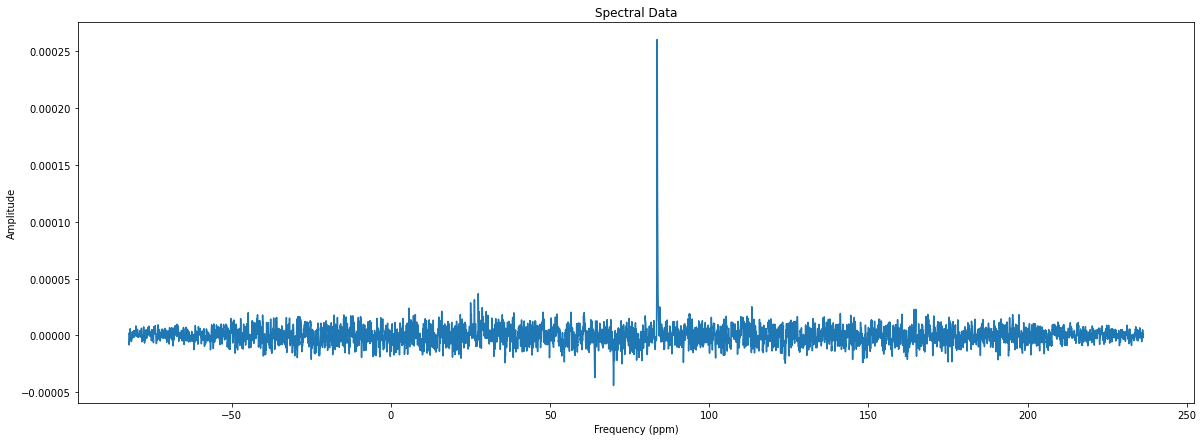

In [21]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(dj_p0_u1_x, dj_p0_u1_yr+dj_p1_u1_yr+dj_p2_u1_yr, '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")

# U2

In [69]:
dj_p0_u2 = pd.read_csv(r'lab4/lab4/lab4_DJ_P0_U2.csv')
dj_p1_u2 = pd.read_csv(r'lab4/lab4/lab4_DJ_P1_U2.csv')
dj_p2_u2 = pd.read_csv(r'lab4/lab4/lab4_DJ_P2_U2.csv')

dj_p0_u2_x = np.array(dj_p0_u2.iloc[0:16383:1,0])
dj_p1_u2_x = np.array(dj_p1_u2.iloc[0:16383:1,0])
dj_p2_u2_x = np.array(dj_p2_u2.iloc[0:16383:1,0])

dj_p0_u2_yr = np.array(dj_p0_u2.iloc[0:16383:1,1])
dj_p1_u2_yr = np.array(dj_p1_u2.iloc[0:16383:1,1])
dj_p2_u2_yr = np.array(dj_p2_u2.iloc[0:16383:1,1])

dj_p0_u2_yi = np.array(dj_p0_u2.iloc[0:16383:1,1])
dj_p1_u2_yi = np.array(dj_p1_u2.iloc[0:16383:1,1])
dj_p2_u2_yi = np.array(dj_p2_u2.iloc[0:16383:1,1])

Text(0, 0.5, 'Amplitude')

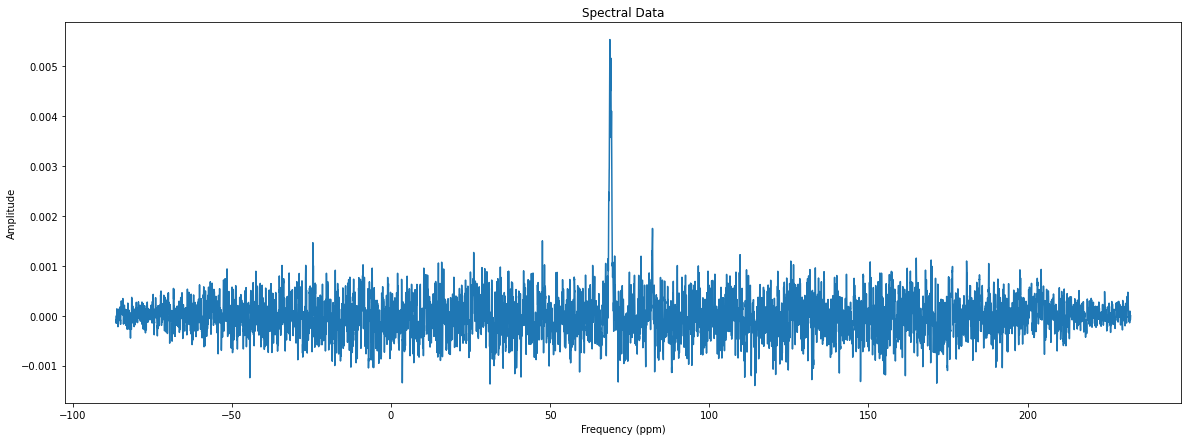

In [70]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(dj_p0_u2_x, dj_p0_u2_yr+dj_p1_u2_yr+dj_p2_u2_yr, '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")

# U3

In [71]:
dj_p0_u3 = pd.read_csv(r'lab4/lab4/lab4_DJ_P0_U3.csv')
dj_p1_u3 = pd.read_csv(r'lab4/lab4/lab4_DJ_P1_U3.csv')
dj_p2_u3 = pd.read_csv(r'lab4/lab4/lab4_DJ_P2_U3.csv')

dj_p0_u3_x = np.array(dj_p0_u3.iloc[0:16383:1,0])
dj_p1_u3_x = np.array(dj_p1_u3.iloc[0:16383:1,0])
dj_p2_u3_x = np.array(dj_p2_u3.iloc[0:16383:1,0])

dj_p0_u3_yr = np.array(dj_p0_u3.iloc[0:16383:1,1])
dj_p1_u3_yr = np.array(dj_p1_u3.iloc[0:16383:1,1])
dj_p2_u3_yr = np.array(dj_p2_u3.iloc[0:16383:1,1])

dj_p0_u3_yi = np.array(dj_p0_u3.iloc[0:8191:1,1])
dj_p1_u3_yi = np.array(dj_p1_u3.iloc[0:8191:1,1])
dj_p2_u3_yi = np.array(dj_p2_u3.iloc[0:8191:1,1])

Text(0, 0.5, 'Amplitude')

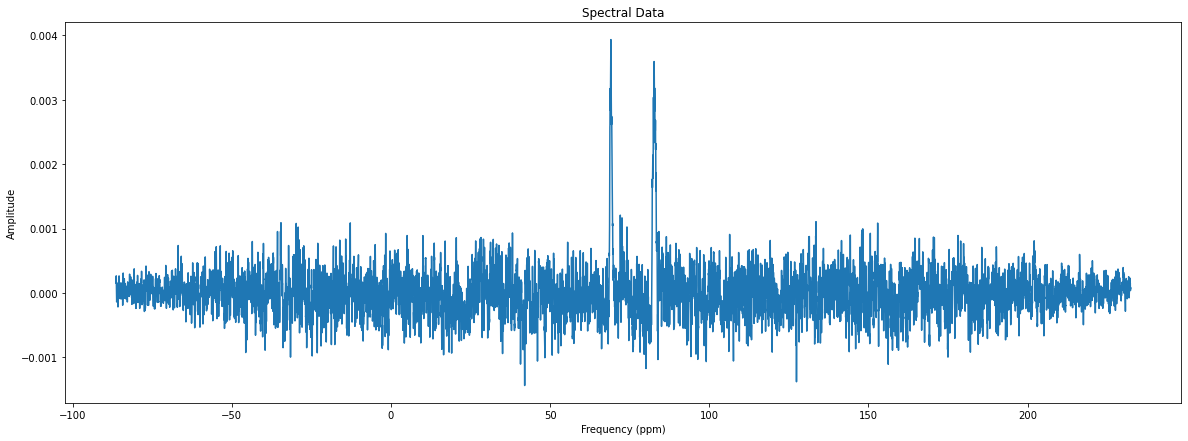

In [72]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(dj_p0_u3_x, dj_p0_u3_yr+dj_p1_u3_yr+dj_p2_u3_yr, '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")

# U4

In [73]:
dj_p0_u4 = pd.read_csv(r'lab4/lab4/lab4_DJ_P0_U4.csv')
dj_p1_u4 = pd.read_csv(r'lab4/lab4/lab4_DJ_P1_U4.csv')
dj_p2_u4 = pd.read_csv(r'lab4/lab4/lab4_DJ_P2_U4.csv')

dj_p0_u4_x = np.array(dj_p0_u4.iloc[0:16383:1,0])
dj_p1_u4_x = np.array(dj_p1_u4.iloc[0:16383:1,0])
dj_p2_u4_x = np.array(dj_p2_u4.iloc[0:16383:1,0])

dj_p0_u4_yr = np.array(dj_p0_u4.iloc[0:16383:1,1])
dj_p1_u4_yr = np.array(dj_p1_u4.iloc[0:16383:1,1])
dj_p2_u4_yr = np.array(dj_p2_u4.iloc[0:16383:1,1])

dj_p0_u4_yi = np.array(dj_p0_u4.iloc[0:8191:1,1])
dj_p1_u4_yi = np.array(dj_p1_u4.iloc[0:8191:1,1])
dj_p2_u4_yi = np.array(dj_p2_u4.iloc[0:8191:1,1])

Text(0, 0.5, 'Amplitude')

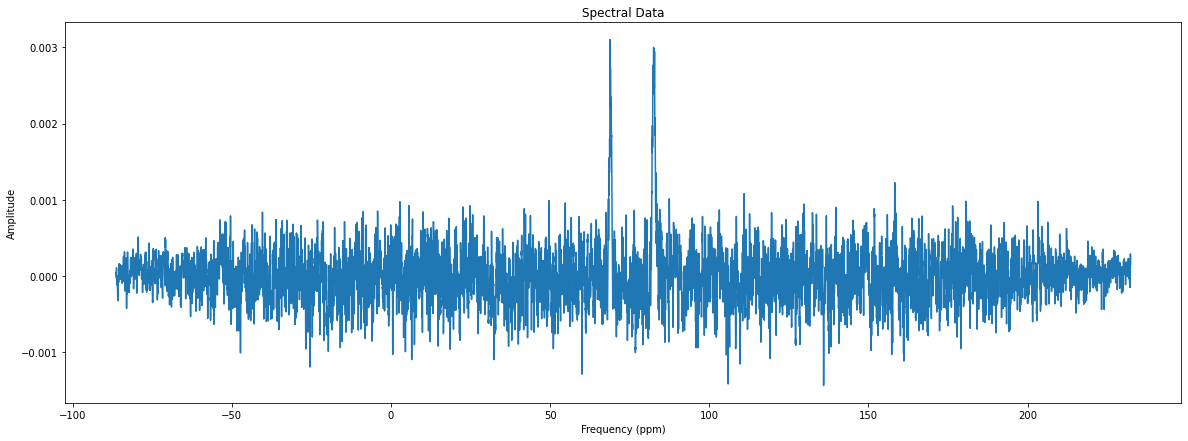

In [74]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(dj_p0_u4_x, dj_p0_u4_yr+dj_p1_u4_yr+dj_p2_u4_yr, '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")

# Grovers

In [85]:
g_p0 = pd.read_csv(r'lab4/lab4/Grover/lab4_grover_P0.csv')
g_p1 = pd.read_csv(r'lab4/lab4/Grover/lab4_grover_P1.csv')
g_p2 = pd.read_csv(r'lab4/lab4/Grover/lab4_grover_P2.csv')

g_p0_x = np.array(g_p0.iloc[0:16383:1,0])
g_p1_x = np.array(g_p1.iloc[0:16383:1,0])
g_p2_x = np.array(g_p2.iloc[0:16383:1,0])

g_p0_yr = np.array(g_p0.iloc[0:16383:1,1])
g_p1_yr = np.array(g_p1.iloc[0:16383:1,1])
g_p2_yr = np.array(g_p2.iloc[0:16383:1,1])

g_p0_yi = np.array(g_p0.iloc[0:16383:1,1])
g_p1_yi = np.array(g_p1.iloc[0:16383:1,1])
g_p2_yi = np.array(g_p2.iloc[0:16383:1,1])

Text(0, 0.5, 'Amplitude')

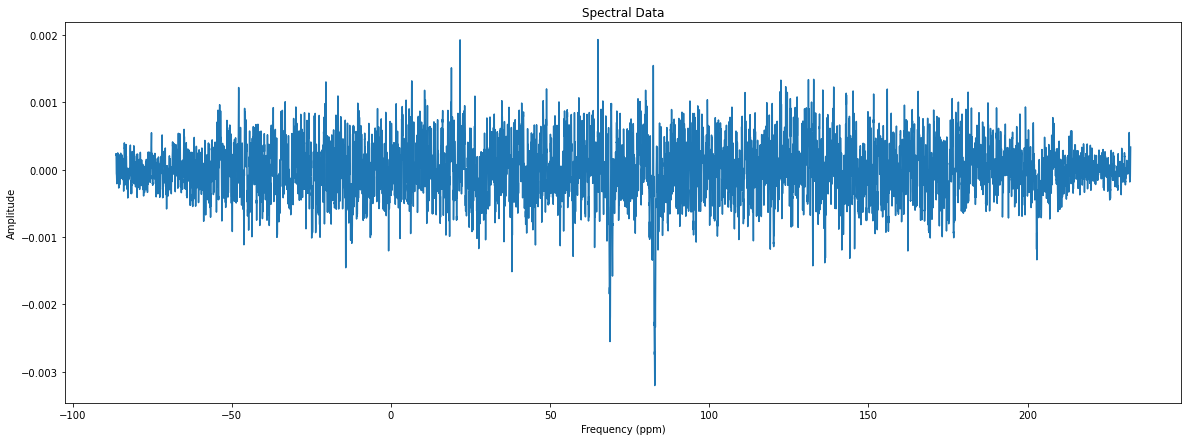

In [90]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(g_p0_x, g_p0_yr + g_p0_yi, '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

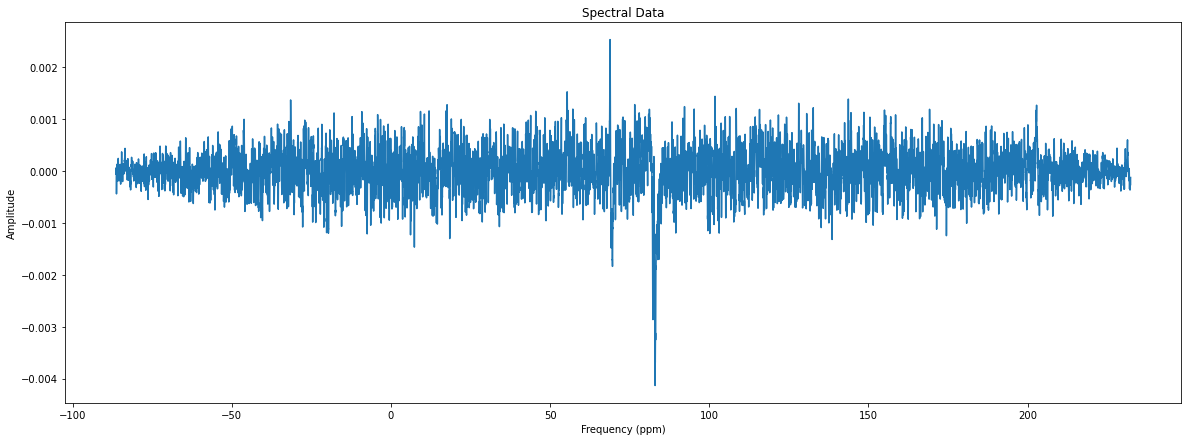

In [91]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(g_p0_x, g_p1_yr + g_p1_yi, '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

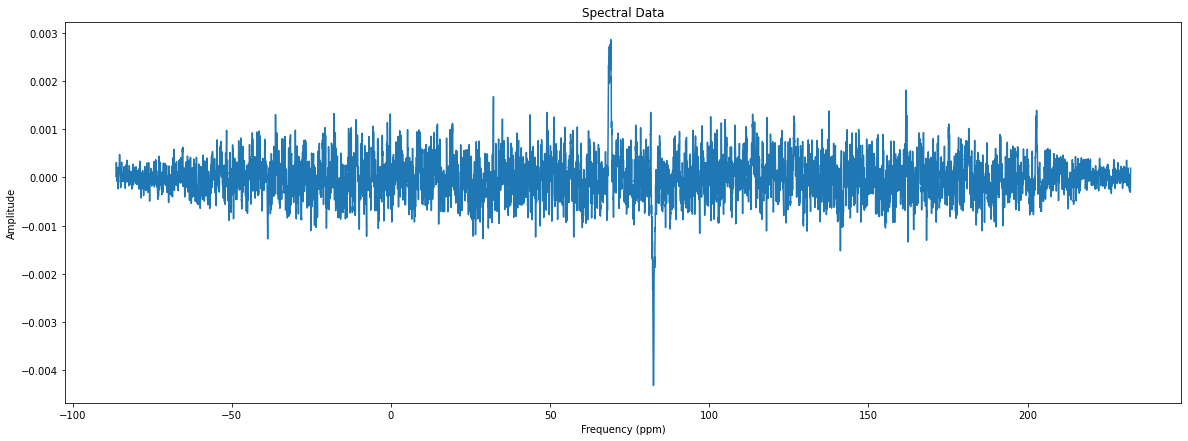

In [92]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(g_p0_x, g_p2_yr + g_p2_yi, '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

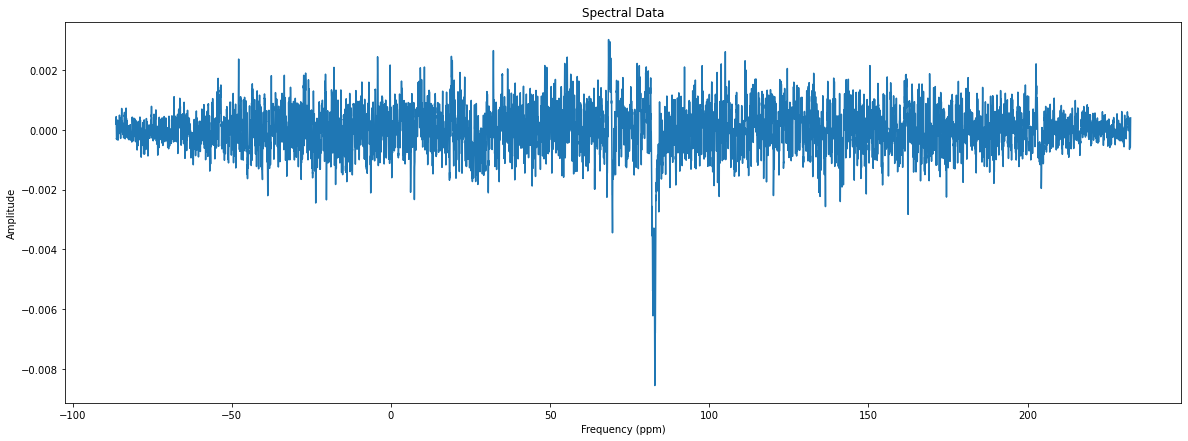

In [94]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(g_p0_x, g_p0_yr+g_p1_yr+g_p2_yr+g_p0_yi+g_p1_yi+g_p2_yi , '-', label =' real data')
#plt.plot(xval, yimag, '-', label = 'imaginary data')
ax.set_title("Spectral Data")
ax.set_xlabel("Frequency (ppm)")
ax.set_ylabel("Amplitude")